In [82]:
import pandas as pd  # Handling data
import numpy as np # Handling numbers

# Plotting
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Modelling Covid restrictions from Covid statistics (Cases, hospitalisations, deaths, vaccinations)

## Covid statistics

In [83]:
# Loading seperate data sets
cases_data = pd.read_csv(r'data\Cases\cases_covid.csv', parse_dates=['date'])
admissions_data = pd.read_csv(r'data\Admissions\admissions_covid.csv', parse_dates=['date'])
deaths_data = pd.read_csv(r'data\Deaths\deaths_covid.csv', parse_dates=['date'])
vaccinations_data = pd.read_csv(r'data\Vaccinations\vaccinations_covid.csv', parse_dates=['date'])

# Merging to a single dataset
covid_data = cases_data.merge(admissions_data)
covid_data = covid_data.merge(deaths_data)
covid_data = covid_data.merge(vaccinations_data)
covid_data = covid_data.drop(columns=['areaCode', 'areaName', 'areaType'])
covid_data.set_index('date')
covid_data

,date,hospitalCases,newCasesByPublishDate,newAdmissions,newDeaths28DaysByDeathDate,cumPeopleVaccinatedCompleteByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,cumVaccinationCompleteCoverageByPublishDatePercentage,newVaccinesGivenByPublishDate
0,2021-10-04,6777.0,35077,747,74,45021381,48994530,45021381,78.3,67008.0
1,2021-10-03,6592.0,30439,682,82,44992044,48956859,44992044,78.2,45655.0
2,2021-10-02,6437.0,30301,669,92,44970512,48932736,44970512,78.2,65457.0
3,2021-10-01,6590.0,35577,651,103,44936121,48901670,44936121,78.1,72469.0
4,2021-09-30,6763.0,36480,654,106,44901832,48863490,44901832,78.1,68831.0
...,...,...,...,...,...,...,...,...,...,...
263,2021-01-14,37691.0,48682,4103,1227,443234,3234946,443234,0.8,321951.0
264,2021-01-13,37487.0,47525,4224,1214,437977,2918252,437977,0.8,288688.0
265,2021-01-12,36981.0,45533,4583,1210,428232,2639309,428232,0.7,223726.0
266,2021-01-11,36751.0,46169,4309,1129,412167,2431648,412167,0.7,165844.0


In [84]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   date                                                   268 non-null    datetime64[ns]
 1   hospitalCases                                          268 non-null    float64       
 2   newCasesByPublishDate                                  268 non-null    int64         
 3   newAdmissions                                          268 non-null    int64         
 4   newDeaths28DaysByDeathDate                             268 non-null    int64         
 5   cumPeopleVaccinatedCompleteByPublishDate               268 non-null    int64         
 6   cumPeopleVaccinatedFirstDoseByPublishDate              268 non-null    int64         
 7   cumPeopleVaccinatedSecondDoseByPublishDate             268 non-null    

In [85]:
covid_data.describe(include=['datetime']).T

C:\Users\stephen.montgomery\Anaconda3\envs\montVenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last
date,268,268,2021-04-03,1,2021-01-10,2021-10-04


In [86]:
covid_data.describe(include=['datetime']).T

C:\Users\stephen.montgomery\Anaconda3\envs\montVenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last
date,268,268,2021-04-03,1,2021-01-10,2021-10-04


In [87]:
covid_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hospitalCases,268.0,8.816246e+03,1.044042e+04,872.0,1748.25,5881.0,8.131000e+03,39254.0
newCasesByPublishDate,268.0,1.860689e+04,1.481469e+04,1649.0,4645.00,14490.0,3.183450e+04,55761.0
newAdmissions,268.0,8.506791e+02,9.425095e+02,80.0,208.00,671.5,9.375000e+02,4583.0
newDeaths28DaysByDeathDate,268.0,1.977948e+02,3.319787e+02,4.0,19.00,79.0,1.397500e+02,1359.0
cumPeopleVaccinatedCompleteByPublishDate,268.0,2.159713e+07,1.695124e+07,391399.0,1978066.00,23062033.5,3.798184e+07,45021381.0
cumPeopleVaccinatedFirstDoseByPublishDate,268.0,3.463544e+07,1.374805e+07,2286572.0,26131667.00,38131227.5,4.675001e+07,48994530.0
cumPeopleVaccinatedSecondDoseByPublishDate,268.0,2.159713e+07,1.695124e+07,391399.0,1978066.00,23062033.5,3.798184e+07,45021381.0
cumVaccinationCompleteCoverageByPublishDatePercentage,268.0,3.755821e+01,2.947414e+01,0.7,3.45,40.1,6.607500e+01,78.3
newVaccinesGivenByPublishDate,267.0,3.420897e+05,1.819118e+05,41523.0,199539.50,316965.0,4.936240e+05,844285.0


In [88]:
list(covid_data.columns)

['date',
 'hospitalCases',
 'newCasesByPublishDate',
 'newAdmissions',
 'newDeaths28DaysByDeathDate',
 'cumPeopleVaccinatedCompleteByPublishDate',
 'cumPeopleVaccinatedFirstDoseByPublishDate',
 'cumPeopleVaccinatedSecondDoseByPublishDate',
 'cumVaccinationCompleteCoverageByPublishDatePercentage',
 'newVaccinesGivenByPublishDate']

### Charting Covid features

In [89]:
covid_features = ['hospitalCases', 
                'newCasesByPublishDate',
                'newAdmissions',
                'newDeaths28DaysByDeathDate',
                'cumPeopleVaccinatedCompleteByPublishDate',
                'cumPeopleVaccinatedFirstDoseByPublishDate', 
                'cumPeopleVaccinatedSecondDoseByPublishDate',
                'cumVaccinationCompleteCoverageByPublishDatePercentage',
                'newVaccinesGivenByPublishDate']
#covid_features
for feature in covid_features:
    fig = px.line(covid_data, x="date", y=feature, title=f'{feature}')
    fig.show()

## Restictions Data

In [90]:
restrictions_data = pd.read_csv(r'data\restrictions_daily.csv', parse_dates=['date']).set_index('date')
restrictions_data.head(5)

,schools_closed,pubs_closed,shops_closed,eating_places_closed,stay_at_home,household_mixing_indoors_banned,wfh,rule_of_6_indoors,curfew,eat_out_to_help_out
date,,,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0
2020-03-05,0,0,0,0,0,0,0,0,0,0


In [91]:
restrictions_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512 entries, 2020-03-01 to 2021-07-25
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   schools_closed                   512 non-null    int64
 1   pubs_closed                      512 non-null    int64
 2   shops_closed                     512 non-null    int64
 3   eating_places_closed             512 non-null    int64
 4   stay_at_home                     512 non-null    int64
 5   household_mixing_indoors_banned  512 non-null    int64
 6   wfh                              512 non-null    int64
 7   rule_of_6_indoors                512 non-null    int64
 8   curfew                           512 non-null    int64
 9   eat_out_to_help_out              512 non-null    int64
dtypes: int64(10)
memory usage: 44.0 KB


In [92]:
restrictions_data.describe().T

,count,mean,std,min,25%,50%,75%,max
schools_closed,512.0,0.257812,0.437858,0.0,0.0,0.0,1.0,1.0
pubs_closed,512.0,0.486328,0.500302,0.0,0.0,0.0,1.0,1.0
shops_closed,512.0,0.435547,0.496313,0.0,0.0,0.0,1.0,1.0
eating_places_closed,512.0,0.486328,0.500302,0.0,0.0,0.0,1.0,1.0
stay_at_home,512.0,0.339844,0.474119,0.0,0.0,0.0,1.0,1.0
household_mixing_indoors_banned,512.0,0.613281,0.487475,0.0,0.0,1.0,1.0,1.0
wfh,512.0,0.853516,0.353937,0.0,1.0,1.0,1.0,1.0
rule_of_6_indoors,512.0,0.187500,0.390694,0.0,0.0,0.0,0.0,1.0
curfew,512.0,0.109375,0.312414,0.0,0.0,0.0,0.0,1.0
eat_out_to_help_out,512.0,0.054688,0.227592,0.0,0.0,0.0,0.0,1.0


## Merging covid statistics and restrictions data

In [93]:
restrictions_data.tail(5)

,schools_closed,pubs_closed,shops_closed,eating_places_closed,stay_at_home,household_mixing_indoors_banned,wfh,rule_of_6_indoors,curfew,eat_out_to_help_out
date,,,,,,,,,,
2021-07-21,0,0,0,0,0,0,0,0,0,0
2021-07-22,0,0,0,0,0,0,0,0,0,0
2021-07-23,0,0,0,0,0,0,0,0,0,0
2021-07-24,0,0,0,0,0,0,0,0,0,0
2021-07-25,0,0,0,0,0,0,0,0,0,0


In [98]:
df = restrictions_data.join(covid_data).fillna(0)
df = df.drop(columns=['date'])
#df.info()
df.to_parquet(r'S:\Information & Data\Data\Covid\covid.parquet')

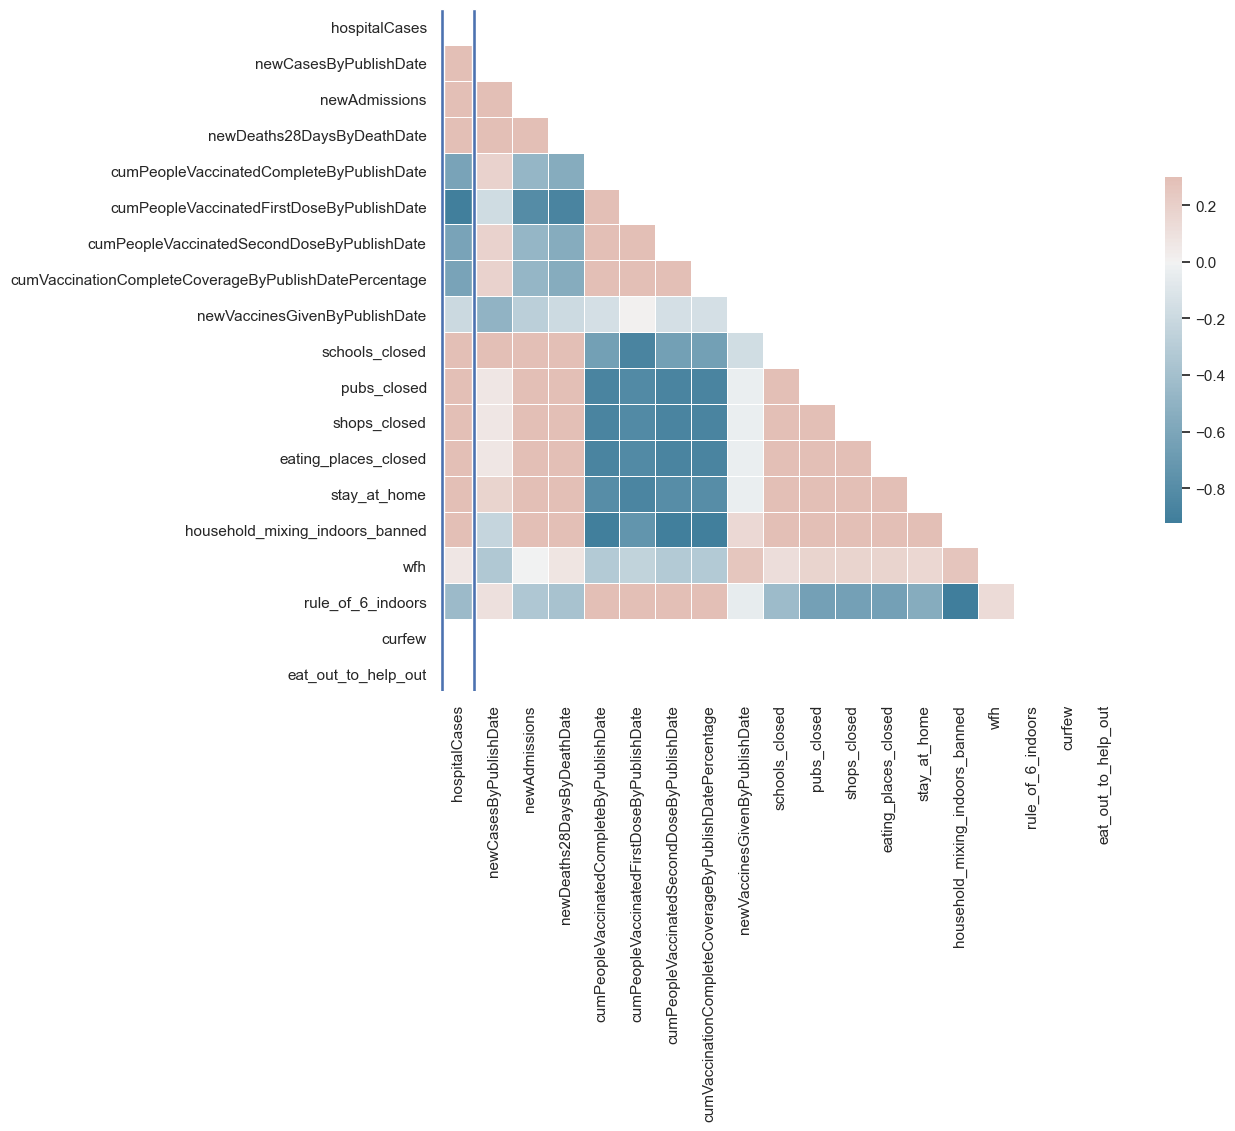

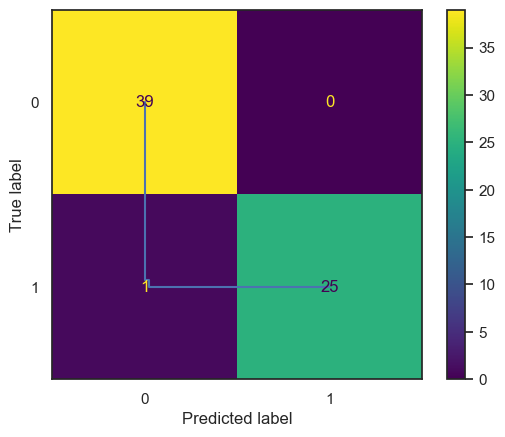

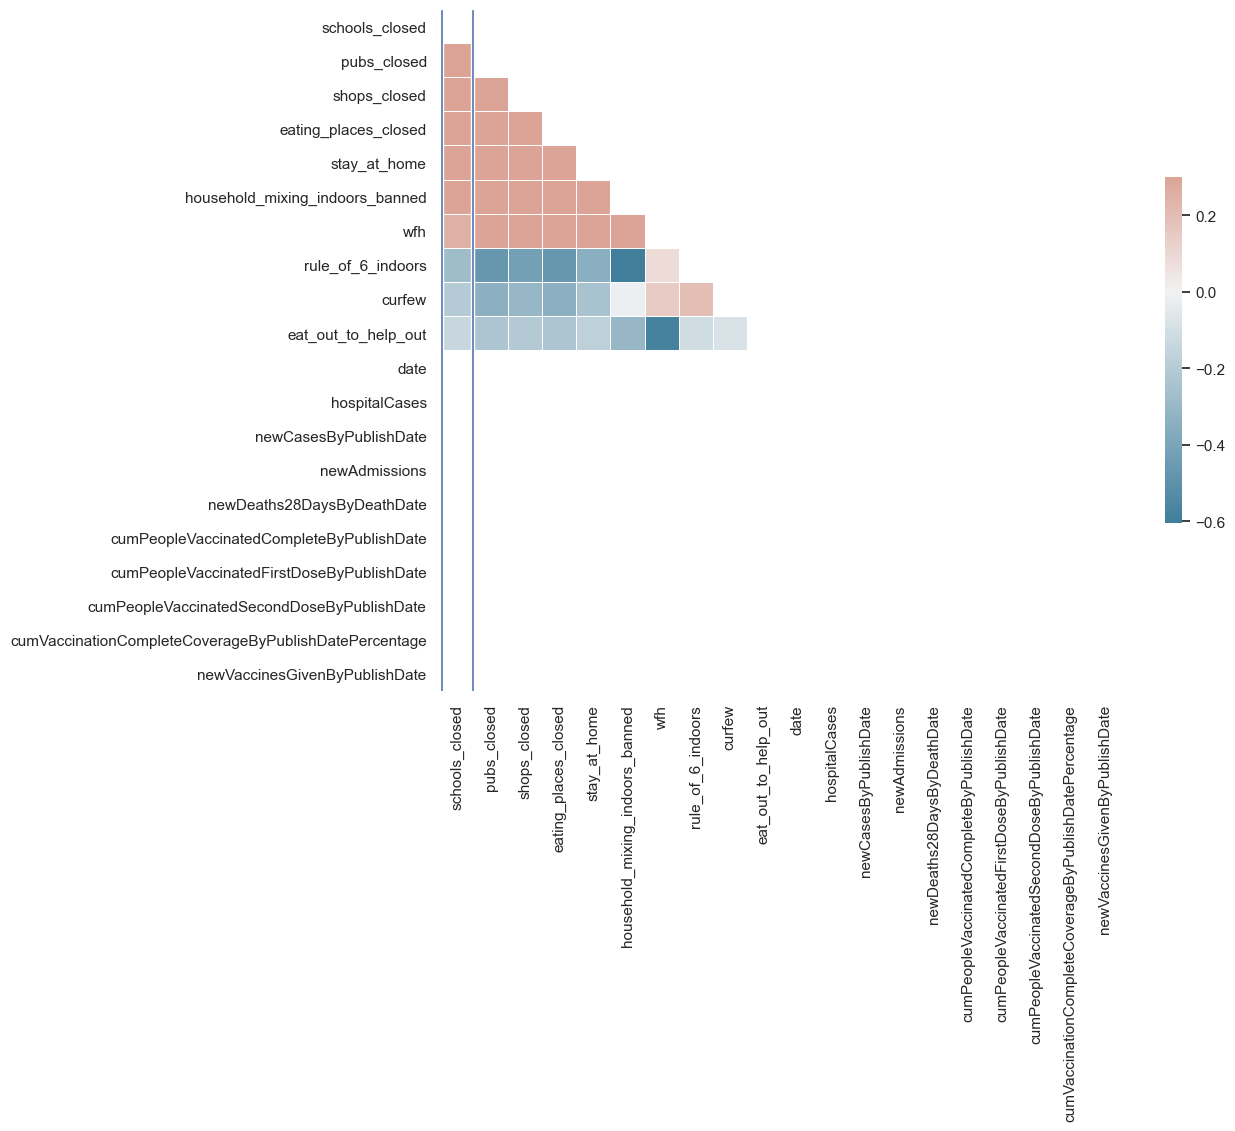

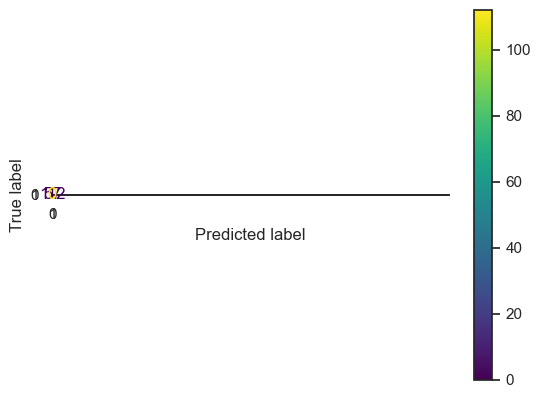

In [75]:
plt.plot(df.schools_closed)
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 2020-03-01 00:00:00 to 2021-07-25 00:00:00
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   schools_closed                                         512 non-null    int64  
 1   pubs_closed                                            512 non-null    int64  
 2   shops_closed                                           512 non-null    int64  
 3   eating_places_closed                                   512 non-null    int64  
 4   stay_at_home                                           512 non-null    int64  
 5   household_mixing_indoors_banned                        512 non-null    int64  
 6   wfh                                                    512 non-null    int64  
 7   rule_of_6_indoors                                      512 non-null    int64  
 8   curfew               

In [62]:
print(f'The minimum date is: {df.index.min()}, and the maximum date is: {df.index.max()}')

The minimum date is: 2020-03-01 00:00:00, and the maximum date is: 2021-07-25 00:00:00


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
schools_closed,512.0,0.257812,0.437858,0.0,0.0,0.0,1.0,1.0
pubs_closed,512.0,0.486328,0.500302,0.0,0.0,0.0,1.0,1.0
shops_closed,512.0,0.435547,0.496313,0.0,0.0,0.0,1.0,1.0
eating_places_closed,512.0,0.486328,0.500302,0.0,0.0,0.0,1.0,1.0
stay_at_home,512.0,0.339844,0.474119,0.0,0.0,0.0,1.0,1.0
household_mixing_indoors_banned,512.0,0.613281,0.487475,0.0,0.0,1.0,1.0,1.0
wfh,512.0,0.853516,0.353937,0.0,1.0,1.0,1.0,1.0
rule_of_6_indoors,512.0,0.187500,0.390694,0.0,0.0,0.0,0.0,1.0
curfew,512.0,0.109375,0.312414,0.0,0.0,0.0,0.0,1.0
eat_out_to_help_out,512.0,0.054688,0.227592,0.0,0.0,0.0,0.0,1.0


### Exploring correlations

In [63]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

In [64]:
feature = 'stay_at_home'
fig = px.line(df, x="date", y=feature, title=f'{feature}')
fig.show()

### Modelling 'Stay at home rule'

In [65]:
stats_features = ['hospitalCases',
                'newCasesByPublishDate',
                'newAdmissions',
                'newDeaths28DaysByDeathDate',
                'cumPeopleVaccinatedCompleteByPublishDate',
                'cumPeopleVaccinatedFirstDoseByPublishDate',
                'cumPeopleVaccinatedSecondDoseByPublishDate',
                'cumVaccinationCompleteCoverageByPublishDatePercentage',
                'newVaccinesGivenByPublishDate', 'stay_at_home']

In [66]:
# Creating a data set to use covid stats to model 'stay at home'
model_df = df[stats_features].dropna()
# Splitting into features and target
X = model_df.drop(columns=['stay_at_home'])
y = model_df['stay_at_home']
print(f'The shape of X is: {X.shape}, the shape of y is: {y.shape}')

The shape of X is: (512, 9), the shape of y is: (512,)


In [67]:
plt.hist(y)

(array([338.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 174.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [68]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [70]:
from sklearn import metrics

# Consusion matrix
confusion_matrix = metrics.plot_confusion_matrix(clf, X_test, y_test)

In [71]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.6627218934911243

In [72]:
# Accuracy
metrics.f1_score(y_test, y_pred)

0.0

In [73]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC: ', round(auc,2))

AUC:  0.5
